# Predicting the Age of Crabs: A Machine Learning Approach

The objective of this study was to <mark>predict the age of crabs</mark> based on various physical characteristics such as length, diameter, height, and weight, as well as sex. Exploratory data analysis was conducted on the crab dataset, which included visualizations such as histograms, violin plots, scatter plots, and box plots. The data was then split into training and testing sets, and five different machine learning algorithms were used to build models to predict crab age. The performance of each model was evaluated using mean absolute error, mean squared error, and R-squared. The results indicated that the <mark>random forest</mark> algorithm provided the best performance with an<mark> R-squared value of 0.58</mark>. Overall, this study demonstrates the potential of machine learning algorithms to accurately predict crab age based on physical characteristics.

![Cute crab](https://www.baltimoresun.com/resizer/3uDSSR0A7sgZkCD9mhVa8CBz8_U=/1200x799/top/arc-anglerfish-arc2-prod-tronc.s3.amazonaws.com/public/O7WSHD2XR5GKHMUEHXCWP2RDYU.jpg)


# Problem statement

The objective of this project is to build a machine learning model that can accurately predict the age of crabs based on various physical measurements. The dataset contains information on the gender, weight, carapace length, carapace width, and abdomen width of crabs, as well as their actual age. The model should be able to take in these features as input and output a prediction of the crab's age in years. This type of predictive model could be useful in the fishing and seafood industry, where the age of crabs is an important factor in determining their quality and market value.

## Table of Contents

* [Data cleaning](#section-1)
* [Exploratory Data Analysis](#section-2)
* [Feature Engineering](#section-3)
* [Model Building](#section-4)
* [Model Evaluation](#section-5)
* [Best Model ](#section-6)
* [Conclusion](#section-7)



In [44]:
import pandas as pd

In [138]:
df = pd.read_csv('CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


The describe() function is used to generate descriptive statistics of the DataFrame such as count, mean, standard deviation, minimum and maximum values, and the quartile ranges. 

In [139]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [48]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

There is no NAN values in the given dataset

In [49]:
df.Sex.value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

### Age of the crab

The maximum age of a crab can vary widely depending on the species. Some species of crab have very short lifespans, while others can live for several decades.

For example, the common blue crab (Callinectes sapidus) typically lives for 1-3 years in the wild, while the Dungeness crab (Metacarcinus magister) can live up to 10 years. The giant Japanese spider crab (Macrocheira kaempferi) is known to live up to 100 years in the wild.

It's important to note that the lifespan of a crab can be affected by a number of factors, including environmental conditions, predation, and disease. So while some crabs have the potential to live for a long time, many may not reach their maximum lifespan due to these factors.

Crabs have an average lifespan of 3 to 5 years, with some species living up to 30 years.

However, this greatly depends on the species of the crab. There are many different crab species, and their age ranges all vary.

In [120]:
print(f'Maximum age :{df.Age.max()/12}')
print(f'Mean age :{df.Age.mean()/12}')
print(f'Minimum age :{df.Age.min()/12}')

Maximum age :2.4166666666666665
Mean age :0.8295658874903674
Minimum age :0.08333333333333333


In [140]:
df1 = df.copy()

# Data Cleaning
<a id='section-1'></a>

# Outliers removal

To find outliers in the any column of a Pandas DataFrame, we can use various statistical methods. One common method is to use the interquartile range (IQR) method, which involves calculating the IQR and then identifying any data points that fall more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

In [141]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
# for all columns
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
IQR

# Find any data points that fall more than 1.5 times the IQR below Q1 or 
#above Q3 for all columns 
# Find the rows containing outliers in any column
outliers = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).apply(lambda x: x.any(), axis=1)]

# Remove the outliers from the DataFrame
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the updated DataFrame and the outliers
print("Outliers:")
print(outliers)
print("\nDataFrame without outliers:")
df2         

Outliers:
     Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
33     F  1.4875    1.1875  0.4250  35.351827       13.607760        6.378637   
52     I  1.3750    1.1000  0.4125  24.394745        8.845044        4.791066   
55     F  1.7750    1.4125  0.4875  48.945412       18.086981        9.539607   
79     M  1.9375    1.4250  0.5500  57.606184       20.836883       13.480187   
82     M  1.5750    1.2875  0.4000  28.803092       11.949314        6.917278   
...   ..     ...       ...     ...        ...             ...             ...   
3815   M  1.8625    1.4625  0.5375  70.845400       26.265812       13.380964   
3818   F  1.2375    1.0000  0.3875  18.271253        6.860579        3.756309   
3862   F  1.7125    1.3125  0.4375  48.477645       15.351254        8.759996   
3867   I  1.0750    0.8500  0.0000  12.133586        5.854172        2.438057   
3870   F  1.7000    1.3750  0.5000  45.245802       14.883487       11.552421   

      Shell Weigh

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_14480\2328167645.py:11: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_14480\2328167645.py:14: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


# Exploratory Data Analysis
<a id='section-2'></a>

Exploratory Data Analysis (EDA) is the process of examining and understanding the dataset to summarize its main characteristics, uncover patterns, and identify relationships between the variables. The purpose of EDA is to gain insights into the data, develop an understanding of the underlying structure, and identify potential outliers or anomalies that may require further investigation. In the context of crab age prediction, EDA may involve examining the distribution of age across different species of crabs, exploring the relationship between age and various physical attributes, and identifying any missing or inconsistent data points. EDA can be performed using various statistical and visualization techniques, such as histograms, scatter plots, box plots, and correlation matrices.

In [179]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['figure.facecolor'] = '#00000000'

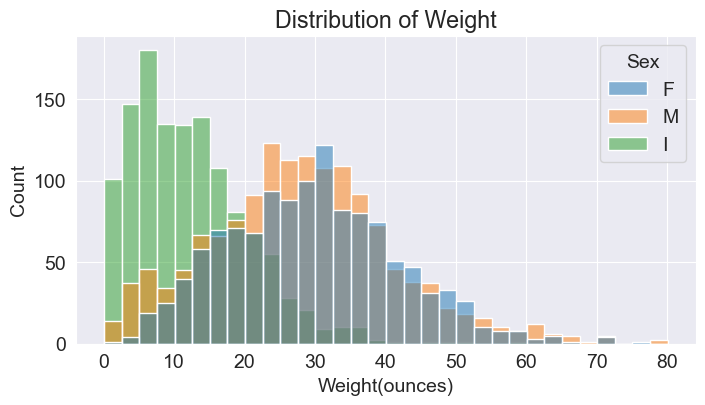

In [180]:
sns.histplot(data = df1,x= 'Weight',hue='Sex')
plt.title('Distribution of Weight')
plt.xlabel('Weight(ounces)')
plt.ylabel('Count')
plt.show()

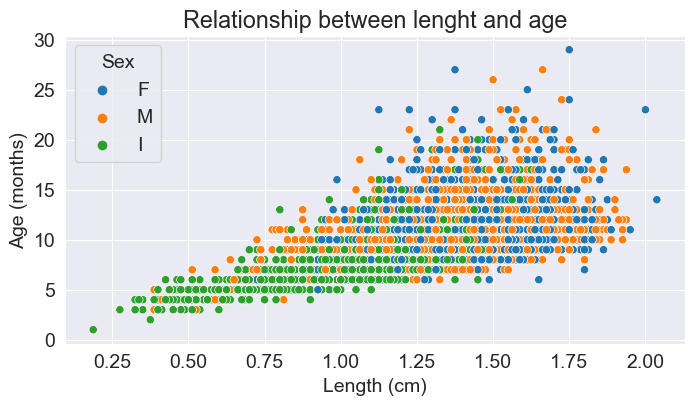

In [181]:

sns.scatterplot(data=df1, x="Length", y="Age", hue="Sex")
plt.title('Relationship between lenght and age')
plt.xlabel('Length (cm)')
plt.ylabel('Age (months)')
plt.show()

It is possible that there is a positive correlation between the length of the crab and its age, but we cannot determine causality just from the scatter plot. 

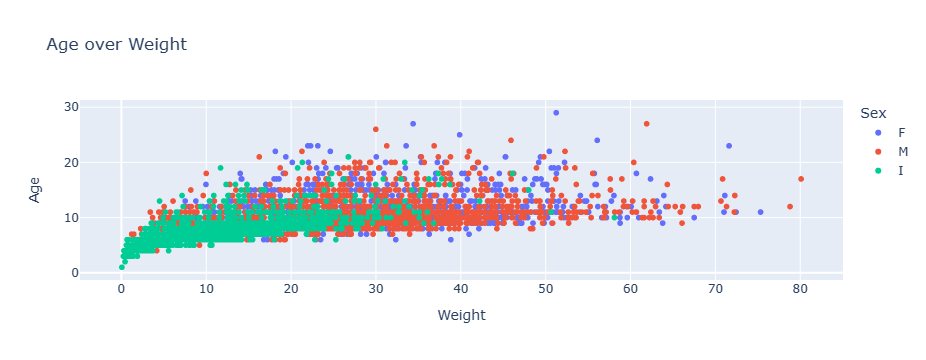

In [182]:
import plotly.express as px

fig = px.scatter( df1,x = 'Weight',y = 'Age',color='Sex',title = 'Age over Weight')
fig.show()


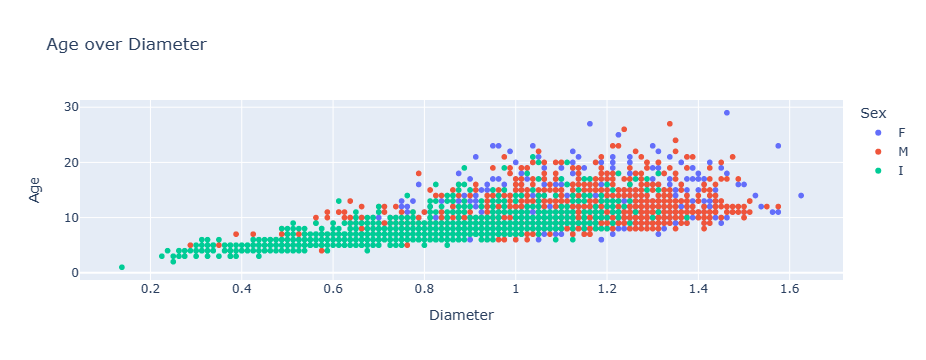

In [145]:
fig = px.scatter( df1,x = 'Diameter',y = 'Age',color='Sex',title = 'Age over Diameter')
fig.show()


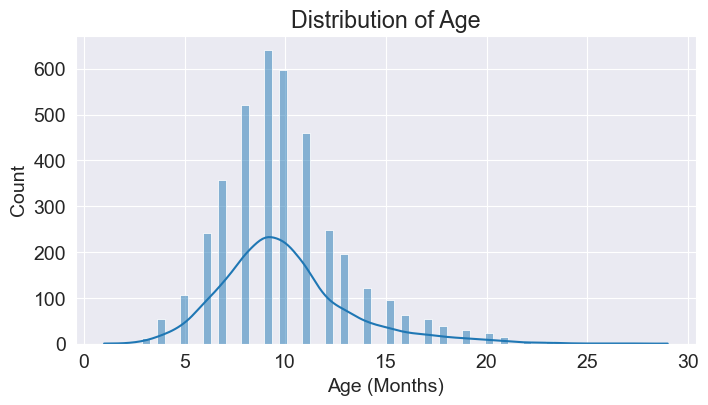

<Figure size 400x400 with 0 Axes>

In [183]:
sns.histplot(data=df1, x="Age", kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.figure(figsize=(4, 4))
plt.show()

It shows the normal distribution of the Age

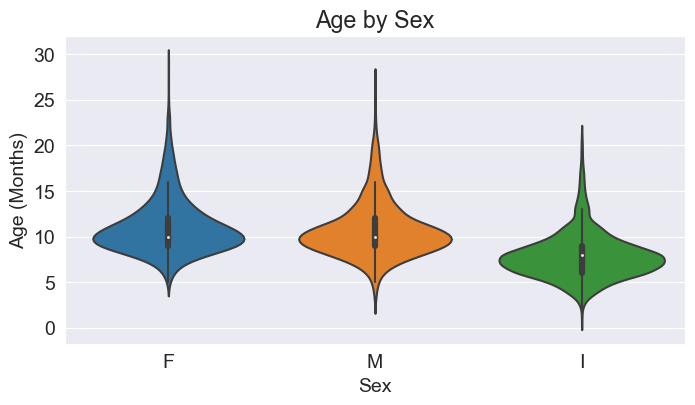

In [184]:
sns.violinplot(data=df1, x="Sex", y="Age")
plt.title('Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age (Months)')
plt.show()

Violin plot has a bulge in the middle, it means that the median of the data is more common than other values. This can happen if the distribution of the data is skewed towards the median or if there are more observations around the median.

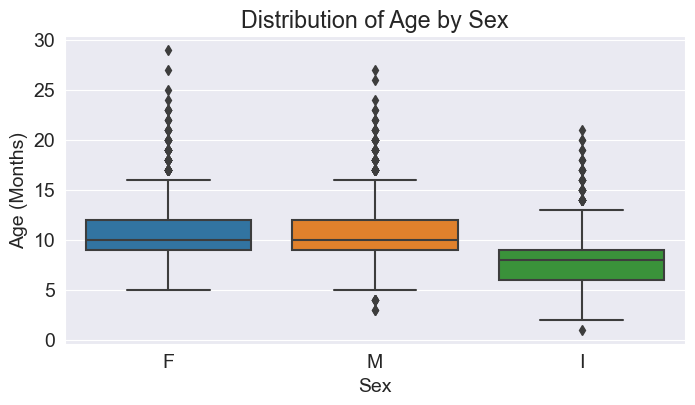

In [185]:
sns.boxplot(data=df1, x="Sex", y="Age")
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age (Months)')
plt.show()

Values such as Median, Quartiles and Outliers  for Male and Female are almost same when compared to Intermediate

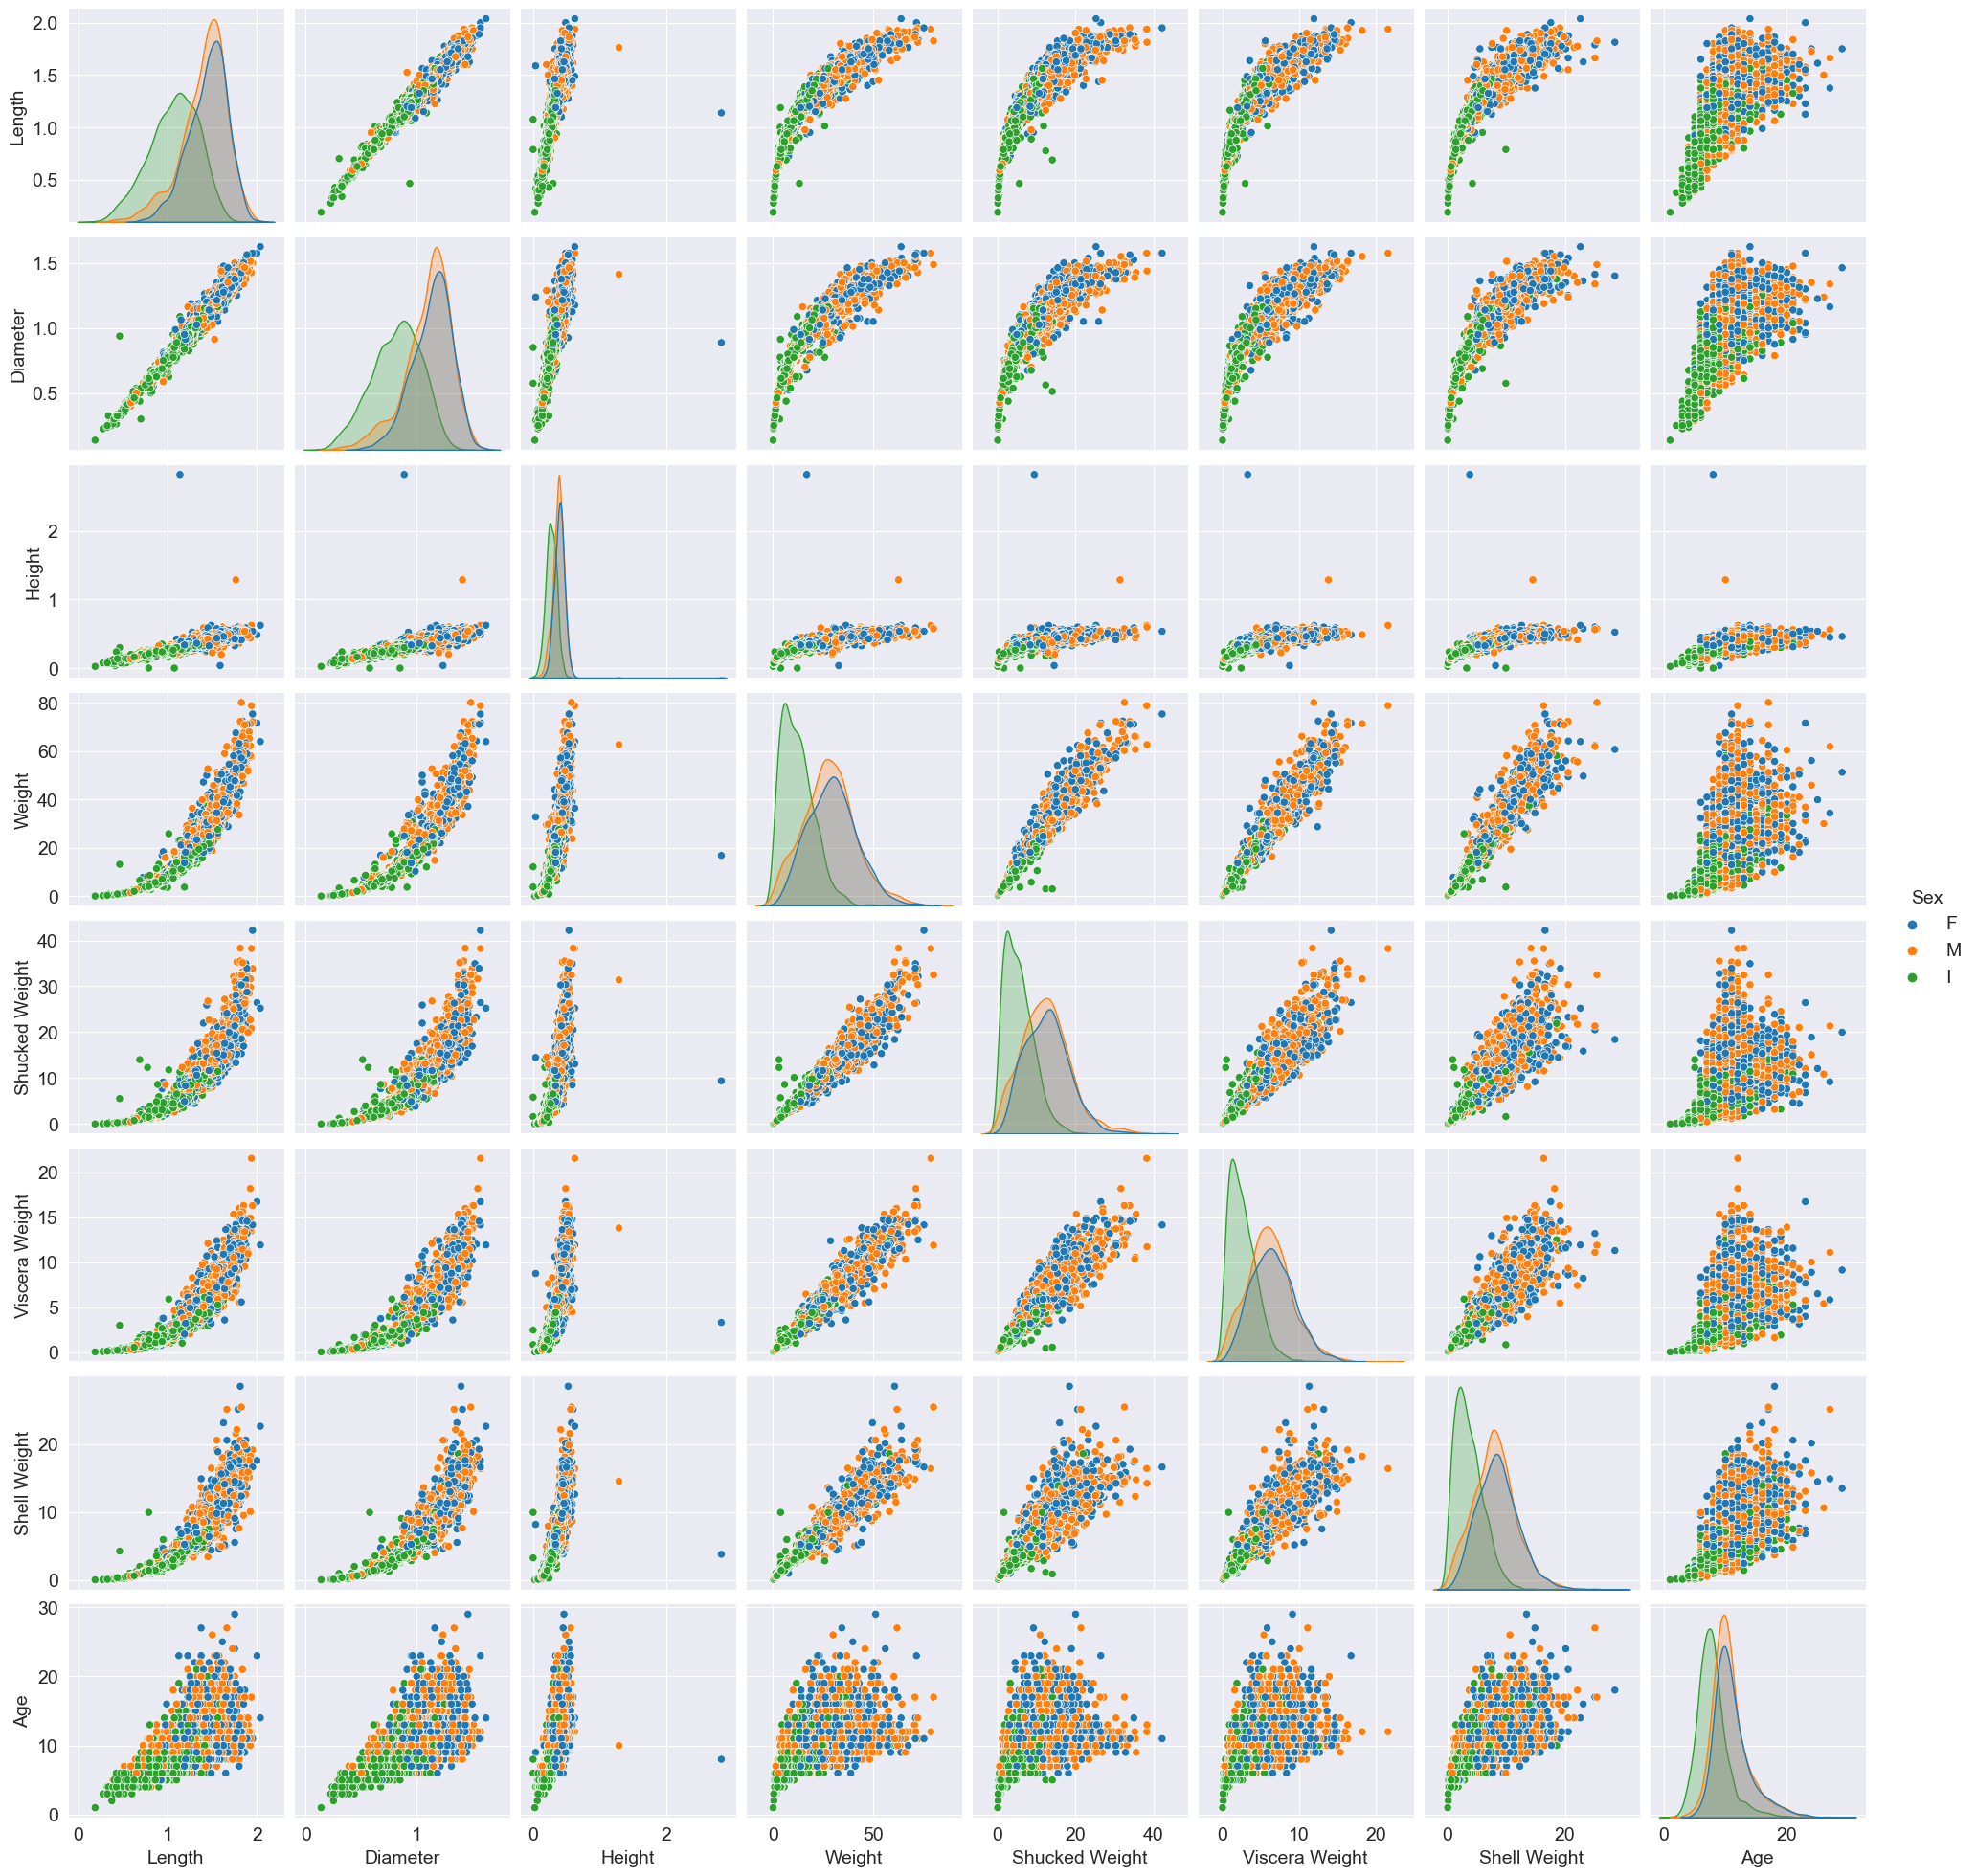

In [186]:
sns.pairplot(data=df1, vars=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age'], hue='Sex')
plt.show()


Pairplot is showing the pairwise relationships between the variables Length, Diameter, Height, Weight, and Age, with the points colored by the Sex variable.

If we look into Age pairwise all other columns shows the better correlations with the age

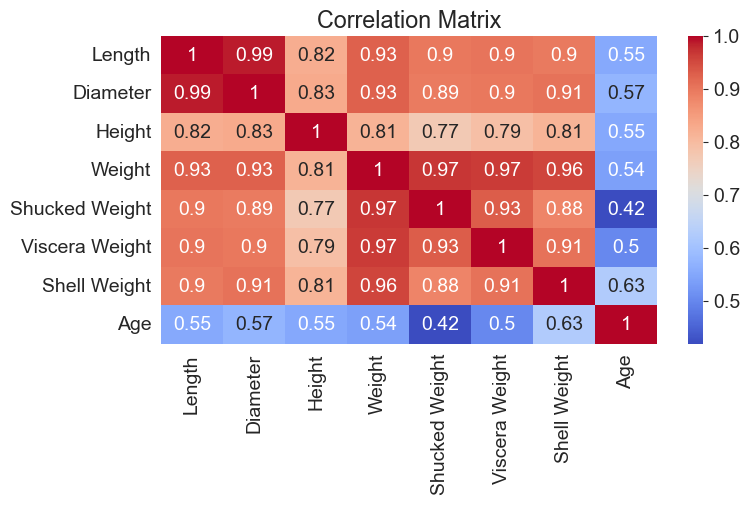

In [187]:
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


Shell weight and Diameter has the most correlation with the age

# Feature Engineering
<a id='section-3'></a>
Predicting the age of a crab can be challenging, as it is not directly measurable and can only be estimated using morphological characteristics. However, there are several feature engineering techniques that can be applied to improve the accuracy of a regression model for this task.

Let's try adding some features:

# 1 ) Body mass index (BMI):

   BMI is a commonly used measure of body weight relative to height. In the case of crabs, this can be calculated as the weight divided by the length or height squared. This can be a useful feature for predicting the age of the crab, as larger and older crabs may have a higher BMI.

In [53]:
# Body Mass Index

df1['BMI'] = df1['Weight']/(df1['Length'] ** 2)

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_14480\1899660366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BMI'] = df1['Weight']/(df1['Length'] ** 2)


# 2) Ratios: 

Ratios of the different measurements can also be calculated to create new features. For example, the length-to-diameter ratio or the weight-to-shucked weight ratio may be useful in predicting the age of the crab.

In [54]:
# Length to diameter ratio

df1['Len_dia_ratio'] = df1['Length'] / df1['Diameter']

# Weight-to-shucked weight ratio
df1['Weight_ShuckedWeight_Ratio'] = df1['Weight'] / df1['Shucked Weight'] 

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_14480\1640817957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Len_dia_ratio'] = df1['Length'] / df1['Diameter']
C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_14480\1640817957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weight_ShuckedWeight_Ratio'] = df1['Weight'] / df1['Shucked Weight']


# 3) Interactions: 

Interactions between the different measurements can also be useful in predicting the age of the crab. For example, the product of the length, height, and weight can be used as a new feature.

In [55]:

# Product of len,height,weight

df1['Length*height*weight'] = df1['Length'] * df1['Height'] * df1['Weight']

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_14480\2809271082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Length*height*weight'] = df1['Length'] * df1['Height'] * df1['Weight']


# 4) Polynomial features:

Polynomial features can be created by squaring or cubing the existing features. This can capture non-linear relationships between the features and the target variable, and can improve the accuracy of the model.

In [56]:
print(df1.shape)
print(poly_data.shape)
print(df1.index)
print(poly_data.index)


(3836, 13)
(3836, 35)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892],
           dtype='int64', length=3836)
RangeIndex(start=0, stop=3836, step=1)


In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Define the features and target variable
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
target = 'Age'

poly = PolynomialFeatures(degree=2, include_bias=False)  # Second-degree polynomial features
poly_features = poly.fit_transform(df1[features])
poly_feature_names = poly.get_feature_names(features)
poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

df1 = df1.reset_index(drop=True)
poly_data = poly_data.reset_index(drop=True)

df1 = pd.concat([df1, poly_data], axis=1)

C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
print(df1.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'BMI', 'Len_dia_ratio',
       'Weight_ShuckedWeight_Ratio', 'Length*height*weight', 'Length',
       'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight',
       'Shell Weight', 'Length^2', 'Length Diameter', 'Length Height',
       'Length Weight', 'Length Shucked Weight', 'Length Viscera Weight',
       'Length Shell Weight', 'Diameter^2', 'Diameter Height',
       'Diameter Weight', 'Diameter Shucked Weight', 'Diameter Viscera Weight',
       'Diameter Shell Weight', 'Height^2', 'Height Weight',
       'Height Shucked Weight', 'Height Viscera Weight', 'Height Shell Weight',
       'Weight^2', 'Weight Shucked Weight', 'Weight Viscera Weight',
       'Weight Shell Weight', 'Shucked Weight^2',
       'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight',
       'Viscera Weight^2', 'Viscera Weight Shell Weight', 'Shell Weight^2'],
      dtype=

The polynomial features transformation generates new columns by combining the existing features in all possible ways up to the specified degree.

For example, the Length^2 column is the result of squaring the Length feature, while Diameter Height is the result of multiplying the Diameter and Height features.

The purpose of generating these additional columns is to allow the linear regression model to capture non-linear relationships between the features and the target variable. By adding these polynomial features to the model, it can better capture complex patterns in the data, resulting in a potentially more accurate prediction.

In [59]:
input_cols = list(df1.drop(columns='Age',axis=1))
target_col = 'Age'

In [60]:
import numpy as np

numeric_cols = df1.drop(columns = ['Sex','Age']).columns.tolist()
categorical_cols = df1.select_dtypes('object').columns.tolist()

In [61]:
print(list(numeric_cols))

['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'BMI', 'Len_dia_ratio', 'Weight_ShuckedWeight_Ratio', 'Length*height*weight', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Length^2', 'Length Diameter', 'Length Height', 'Length Weight', 'Length Shucked Weight', 'Length Viscera Weight', 'Length Shell Weight', 'Diameter^2', 'Diameter Height', 'Diameter Weight', 'Diameter Shucked Weight', 'Diameter Viscera Weight', 'Diameter Shell Weight', 'Height^2', 'Height Weight', 'Height Shucked Weight', 'Height Viscera Weight', 'Height Shell Weight', 'Weight^2', 'Weight Shucked Weight', 'Weight Viscera Weight', 'Weight Shell Weight', 'Shucked Weight^2', 'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight', 'Viscera Weight^2', 'Viscera Weight Shell Weight', 'Shell Weight^2']


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Standardize features
scaled_features = scaler.fit_transform(df1[numeric_cols])
df1[numeric_cols] = scaled_features

# 5)Dimensionality reduction:

Dimensionality reduction techniques such as Principal Component Analysis (PCA) can be used to reduce the number of features while preserving the most important information. This can help to improve the accuracy of the model and reduce overfitting.

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca_features = pca.fit_transform(scaled_features)
pca_features_names = [f'PC{i+1}' for i in range (pca.n_components_)]
pca_data = pd.DataFrame(pca_features, columns=pca_features_names)

df2 = pd.concat([df1, pca_data], axis=1)


In [64]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'sex' column
sex_encoded = encoder.fit_transform(df2['Sex'].values.reshape(-1, 1)).toarray()

# Create a new DataFrame with the one-hot encoded 'sex' column
sex_df = pd.DataFrame(sex_encoded, columns=['sex_intermediate', 'sex_female', 'sex_male'])

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
df3 = pd.concat([df2, sex_df], axis=1)


In [65]:
df3.shape

(3836, 57)

In [66]:
features = df3.drop(columns = ['Sex','Age'],axis =1)
target = 'Age'


# Model Building
<a id='section-4'></a>
# Train Test Split


In machine learning, it is essential to evaluate the performance of a model on unseen data to measure its effectiveness. The train-test split method is a technique used to estimate how well a model can predict outcomes for new, unseen data.

The train-test split involves splitting the dataset into two separate sets: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model's performance on unseen data.

Typically, the training set contains a significant proportion of the data, while the test set contains a smaller proportion, usually around 20-30%. This split helps ensure that the model is not overfitting to the training data and can generalize well to new data.

The train-test split is an essential step in the machine learning pipeline, as it provides an estimate of the model's performance on unseen data, which is the ultimate goal of any machine learning model.

# Linear regression 

It is a statistical method used to establish a relationship between a dependent variable and one or more independent variables. The goal of linear regression is to fit a line or a hyperplane that can best explain the relationship between the dependent variable and the independent variable(s). In other words, linear regression helps us to predict the value of a dependent variable based on the values of one or more independent variables.

In simple linear regression, there is only one independent variable, whereas in multiple linear regression, there are two or more independent variables. The line or hyperplane of best fit is determined by minimizing the sum of the squared errors between the actual and predicted values.

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# Define the features and target variable
features = df3.drop(columns = ['Sex','Age'],axis =1)
target = 'Age'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df3[target], test_size=0.3, random_state=42)

# Create the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)



# Model Evaluation
<a id='section-5'></a>
To evaluate the performance of the model, we can use various metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²) score, and Mean Absolute Error (MAE). 

In [68]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'R-squared:{r2}')
print(f"Root Mean Squared Error: {rmse}")
print(f'Mean squared error: {mse}')

R-squared:0.2568762805866246
Root Mean Squared Error: 2.487886390294697
Mean squared error: 6.189578691013578


This will split the data into training and testing sets, with 80% of the data used for training and 20% used for testing. The random_state parameter sets the seed for the random number generator, ensuring that the same split is obtained every time the code is run.

# Best model 
<a id='section-5'></a>
Let's train the model with several other regression models such as Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,SVR
and find the model which best fits the data with highest accuracy and with its parameters

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Create pipelines for each regression model
pipelines = {
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', LinearRegression())]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', Lasso())]),
    'Ridge': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', Ridge())]),
    'DecisionTree': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', DecisionTreeRegressor())]),
    'RandomForest': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', RandomForestRegressor())]),
    'SVR': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', SVR())])
}

# Define the hyperparameters for each model
parameters = {
    'LinearRegression': {},
    'Lasso': {'regressor__alpha': [0.01, 0.1, 1, 10]},
    'Ridge': {'regressor__alpha': [0.01, 0.1, 1, 10]},
    'DecisionTree': {'regressor__max_depth': [None, 5, 10, 15]},
    'RandomForest': {'regressor__n_estimators': [100, 500, 1000], 'regressor__max_depth': [None, 5, 10, 15]},
    'SVR': {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear', 'poly', 'rbf']}
}

# Perform GridSearchCV on each pipeline
best_estimators = {}

for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"{model_name}: Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}")

# Print the best model and its parameters
best_model_name = max(best_estimators, key=lambda x: best_estimators[x].score(X_test, y_test))
best_model = best_estimators[best_model_name]

print(f"\nBest model: {best_model_name}, Test score: {best_model.score(X_test, y_test)}")
print(f"Best parameters: {best_model.get_params()}") 


LinearRegression: Best parameters: {}, Best score: 0.5651036765380434
Lasso: Best parameters: {'regressor__alpha': 0.01}, Best score: 0.570413147412968
Ridge: Best parameters: {'regressor__alpha': 1}, Best score: 0.576431232548379
DecisionTree: Best parameters: {'regressor__max_depth': 5}, Best score: 0.5013046968666701
RandomForest: Best parameters: {'regressor__max_depth': 5, 'regressor__n_estimators': 500}, Best score: 0.5780963001333588
SVR: Best parameters: {'regressor__C': 1, 'regressor__kernel': 'rbf'}, Best score: 0.5751494798672934

Best model: SVR, Test score: 0.5331096342284021
Best parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('pca', PCA()), ('regressor', SVR(C=1))], 'verbose': False, 'scaler': StandardScaler(), 'pca': PCA(), 'regressor': SVR(C=1), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': None, 'pca__random_state': None, 'pca__svd_solver': 'auto',

,model,best_score,best_params
0,SVR,0.575149,"{'regressor__C': 1, 'regressor__kernel': 'rbf'}"


In [89]:


# Create a list of dictionaries for each model's results
results_list = [
    {'model': 'LinearRegression', 'best_params': {}, 'best_score': 0.5651036765380434},
    {'model': 'Lasso', 'best_params': {'regressor__alpha': 0.01}, 'best_score': 0.570413147412968},
    {'model': 'Ridge', 'best_params': {'regressor__alpha': 1}, 'best_score': 0.576431232548379},
    {'model': 'DecisionTree', 'best_params': {'regressor__max_depth': 5}, 'best_score': 0.5069823576180853},
    {'model': 'RandomForest', 'best_params': {'regressor__max_depth': 5, 'regressor__n_estimators': 1000}, 'best_score': 0.5784806880200877},
    {'model': 'SVR', 'best_params': {'regressor__C': 1, 'regressor__kernel': 'rbf'}, 'best_score': 0.5751494798672934}
]

# Convert the list of dictionaries to a dataframe
results_df = pd.DataFrame(results_list)

# Print the dataframe
results_df.sort_values(by = 'best_score',ascending=False)


,model,best_params,best_score
4,RandomForest,"{'regressor__max_depth': 5, 'regressor__n_esti...",0.578481
2,Ridge,{'regressor__alpha': 1},0.576431
5,SVR,"{'regressor__C': 1, 'regressor__kernel': 'rbf'}",0.575149
1,Lasso,{'regressor__alpha': 0.01},0.570413
0,LinearRegression,{},0.565104
3,DecisionTree,{'regressor__max_depth': 5},0.506982


In [ ]:
# Display the dataframe
print(results_df)

In [188]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

# Conclusion
<a id='section-7'></a>
After evaluating six different regression models on the dataset, we found that <mark>Random Forest Regressor</mark> performed the best with a test score of 0.578. Ridge and SVR also performed well with test scores of <mark>0.576 and 0.575</mark>, respectively. However, Lasso and Linear Regression models had lower test scores compared to the other models. The Decision Tree Regressor had the lowest test score among all the models. Therefore, Random Forest Regressor is recommended for predicting the age of crabs in this dataset.

Overall, the model has a moderate R-squared value and a reasonable RMSE, but a high MSE. This suggests that the model may be useful for predicting the age of crab with a certain level of accuracy, but there is still room for improvement.

In [199]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Load data and split into features and target variable
X = X_train
y = y_train

# Train a random forest regression model on the data
rf = RandomForestRegressor()
rf.fit(X, y)

# Save the trained model as a pickle file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [238]:
import pickle

# Assuming you have a list called feature_names that contains the names of the features
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)


In [ ]:
 # Create interaction features
        interactions = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
        interaction_features = interactions.fit_transform(data)
        interaction_feature_names = interactions.get_feature_names(data.columns)
        interaction_data = pd.DataFrame(interaction_features, columns=interaction_feature_names)

In [206]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [256]:
df.head(1)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.175,0.4125,24.635715,12.332033,5.584852,6.747181,9


In [260]:
def perform_feature_engineering(data):
      
        data['BMI'] = data['Weight']/(data['Length'] ** 2)
        data['Len_dia_ratio'] = data['Length'] / data['Diameter']

        # Weight-to-shucked weight ratio
        data['Weight_ShuckedWeight_Ratio'] = data['Weight'] / data['Shucked Weight'] 
        # Product of len,height,weight

        data['Length*height*weight'] = data['Length'] * data['Height'] * data['Weight']
        
        
        # Define the features and target variable
        features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
        target = 'Age'

        poly = PolynomialFeatures(degree=2, include_bias=False)  # Second-degree polynomial features
        poly_features = poly.fit_transform(df1[features])
        poly_feature_names = poly.get_feature_names(features)
        poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

        data = data.reset_index(drop=True)
        poly_data = poly_data.reset_index(drop=True)

        data = pd.concat([data, poly_data], axis=1)
         # One-hot encode the 'sex' column
        encoder = OneHotEncoder(sparse=False)
        sex_encoded = encoder.fit_transform(data[['Sex']])

        # Modify the column names in the sex_df DataFrame to match the expected names
        sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names(["sex"]))

        # Concatenate the original DataFrame and the new one-hot encoded DataFrame
        data = pd.concat([data, sex_df], axis=1)
   
    
        # Drop the original columns used to create the interaction features
        data = data.drop(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight'], axis=1)
    
        return data

In [263]:
data0 = df.loc[1:3]
data0

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10


In [315]:
def predict_crab_age(sex, length, diameter, height, weight, shucked_weight, viscera_weight, shell_weight):
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np

    data = pd.DataFrame({'Sex': [sex],
                          'Length': [length],
                          'Diameter': [diameter],
                          'Height': [height],
                          'Weight': [weight],
                          'Shucked weight': [shucked_weight],
                          'Viscera weight': [viscera_weight],
                          'Shell weight': [shell_weight]})
    data['BMI'] = data['Weight']/(data['Length'] ** 2)
    data['Len_dia_ratio'] = data['Length'] / data['Diameter']
    data['Weight_ShuckedWeight_Ratio'] = data['Weight'] / data['Shucked weight'] 
        # Product of len,height,weight

    data['Length*height*weight'] = data['Length'] * data['Height'] * data['Weight']
    
    features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
    target = 'Age'
    poly = PolynomialFeatures(degree=2, include_bias=False)  # Second-degree polynomial features
    poly_features = poly.fit_transform(data[features])
    poly_feature_names = poly.get_feature_names(features)
    poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

    data = data.reset_index(drop=True)
    poly_data = poly_data.reset_index(drop=True)

    data = pd.concat([data, poly_data], axis=1)
         # One-hot encode the 'sex' column
    encoder = OneHotEncoder(sparse=False)
    sex_encoded = encoder.fit_transform(data[['Sex']])

        # Modify the column names in the sex_df DataFrame to match the expected names
    sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names(["sex"]))

        # Concatenate the original DataFrame and the new one-hot encoded DataFrame
    data = pd.concat([data, sex_df], axis=1)
     
    numeric_cols = data.drop(columns = ['Sex']).columns.tolist()
    

    scaler = MinMaxScaler()  # Standardize features
    scaled_features = scaler.fit_transform(data[numeric_cols])
    data[numeric_cols] = scaled_features
    #PCA
    pca = PCA(n_components=6)
    pca_features = pca.fit_transform(scaled_features)
    pca_features_names = [f'PC{i+1}' for i in range (pca.n_components_)]
    pca_data = pd.DataFrame(pca_features, columns=pca_features_names)

    data = pd.concat([data, pca_data], axis=1)
  

   
    return data

In [316]:
predict_crab_age('M',0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222)

C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



ValueError: n_components=6 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [319]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def predict_crab_age(sex, length, diameter, height, weight, shucked_weight, viscera_weight, shell_weight):
    data = pd.DataFrame({'Sex': [sex],
                          'Length': [length],
                          'Diameter': [diameter],
                          'Height': [height],
                          'Weight': [weight],
                          'Shucked weight': [shucked_weight],
                          'Viscera weight': [viscera_weight],
                          'Shell weight': [shell_weight]})
    data['BMI'] = data['Weight']/(data['Length'] ** 2)
    data['Len_dia_ratio'] = data['Length'] / data['Diameter']
    data['Weight_ShuckedWeight_Ratio'] = data['Weight'] / data['Shucked weight'] 
    data['Length*height*weight'] = data['Length'] * data['Height'] * data['Weight']
    
    features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
    target = 'Age'
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(data[features])
    poly_feature_names = poly.get_feature_names_out(features)
    poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

    data = data.reset_index(drop=True)
    poly_data = poly_data.reset_index(drop=True)

    data = pd.concat([data, poly_data], axis=1)

    sex_map = {'M': 0, 'F': 1, 'I': 2}
    data['Sex'] = data['Sex'].map(sex_map)

    encoder = OneHotEncoder(sparse=False)
    sex_encoded = encoder.fit_transform(data[['Sex']])

    sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names(["Sex"]))

    data = pd.concat([data, sex_df], axis=1)

    numeric_cols = data.drop(columns=['Sex']).columns.tolist()

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(data[numeric_cols])
    data[numeric_cols] = scaled_features

    pca = PCA(n_components=1)
    pca_features = pca.fit_transform(scaled_features)
    pca_features_names = [f'PC{i+1}' for i in range (pca.n_components_)]
    pca_data = pd.DataFrame(pca_features, columns=pca_features_names)

    data = pd.concat([data, pca_data], axis=1)

    # Load the trained model
    import pickle
    with open('rf_model.pkl', 'rb') as f:
        model = pickle.load(f)
        
    predicted_age = model.predict(data)
    return predicted_age


In [320]:
predict_crab_age('M',0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222)

C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ARAVINTH\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Diameter Shell weight
- Diameter Shucked weight
- Diameter Viscera weight
- Height Shell weight
- Height Shucked weight
- ...
Feature names seen at fit time, yet now missing:
- Diameter Shell Weight
- Diameter Shucked Weight
- Diameter Viscera Weight
- Height Shell Weight
- Height Shucked Weight
- ...




ValueError: X has 49 features, but RandomForestRegressor is expecting 55 features as input.

In [305]:
predict_crab_age('M',0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222)

KeyError: "['Shucked Weight', 'Viscera Weight', 'Shell Weight'] not in index"

In [279]:
def predict_crab_age(sex, length, diameter, height, weight, shucked_weight, viscera_weight, shell_weight):
    data = pd.DataFrame({'Sex': [sex],
                          'Length': [length],
                          'Diameter': [diameter],
                          'Height': [height],
                          'Weight': [weight],
                          'Shucked weight': [shucked_weight],
                          'Viscera weight': [viscera_weight],
                          'Shell weight': [shell_weight]})
    # Feature engineering
    data['BMI'] = data['Weight']/(data['Length'] ** 2)
    data['Len_dia_ratio'] = data['Length'] / data['Diameter']

        # Weight-to-shucked weight ratio
    data['Weight_ShuckedWeight_Ratio'] = data['Weight'] / data[shucked_weight] 
        # Product of len,height,weight

    data['Length*height*weight'] = data['Length'] * data['Height'] * data['Weight']
     
        # Define the features and target variable
    features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
    target = 'Age'
    poly = PolynomialFeatures(degree=2, include_bias=False)  # Second-degree polynomial features
    poly_features = poly.fit_transform(df1[features])
    poly_feature_names = poly.get_feature_names(features)
    poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

    data = data.reset_index(drop=True)
    poly_data = poly_data.reset_index(drop=True)

    data = pd.concat([data, poly_data], axis=1)
         # One-hot encode the 'sex' column
    encoder = OneHotEncoder(sparse=False)
    sex_encoded = encoder.fit_transform(data[['Sex']])

        # Modify the column names in the sex_df DataFrame to match the expected names
    sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names(["sex"]))

        # Concatenate the original DataFrame and the new one-hot encoded DataFrame
    data = pd.concat([data, sex_df], axis=1)
    
    
    pca = PCA(n_components=6)
    pca_features = pca.fit_transform(scaled_features)
    pca_features_names = [f'PC{i+1}' for i in range (pca.n_components_)]
    pca_data = pd.DataFrame(pca_features, columns=pca_features_names)

    data = pd.concat([data, pca_data], axis=1)
    
    return data

In [280]:
predict_crab_age('M',0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222)

KeyError: 2.29631

In [243]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained random forest regression model
with open('rf_model.pkl', 'rb') as file:
    model = pickle.load(file)




model = joblib.load('rf_model.pkl')

def predict_crab_age(sex, length, diameter, height, weight, shucked_weight, viscera_weight, shell_weight):
    # Load the trained model
    model = joblib.load('rf_model.pkl')

    # Load the feature names used to train the model
    feature_names = joblib.load('feature_names.pkl')

    # Create a new DataFrame for the crab properties
    crab_props = pd.DataFrame({'Sex': [sex],
                               'Diameter': [diameter],
                               'Height': [height],
                               'Length': [length],
                               'Whole weight': [weight],
                               'Shucked weight': [shucked_weight],
                               'Viscera weight': [viscera_weight],
                               'Shell weight': [shell_weight]})



    # Use the trained model to predict the age of the crab
    predicted_age = model.predict(crab_props)

    return predicted_age[0]



In [ ]:
predict_crab_age('M', 0.75, 0.6, 0.19, 0.36, 0.15, 0.08, 0.1)


ValueError: could not convert string to float: 'M'

In [246]:
X_train.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'BMI', 'Len_dia_ratio',
       'Weight_ShuckedWeight_Ratio', 'Length*height*weight', 'Length',
       'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight',
       'Shell Weight', 'Length^2', 'Length Diameter', 'Length Height',
       'Length Weight', 'Length Shucked Weight', 'Length Viscera Weight',
       'Length Shell Weight', 'Diameter^2', 'Diameter Height',
       'Diameter Weight', 'Diameter Shucked Weight', 'Diameter Viscera Weight',
       'Diameter Shell Weight', 'Height^2', 'Height Weight',
       'Height Shucked Weight', 'Height Viscera Weight', 'Height Shell Weight',
       'Weight^2', 'Weight Shucked Weight', 'Weight Viscera Weight',
       'Weight Shell Weight', 'Shucked Weight^2',
       'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight',
       'Viscera Weight^2', 'Viscera Weight Shell Weight', 'Shell Weight^2',
       'PC1', 'PC2', 'PC3',

In [ ]:
Initial df with the columns 
['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']

Feature engineering

df1['BMI'] = df1['Weight']/(df1['Length'] ** 2)
# Length to diameter ratio

df1['Len_dia_ratio'] = df1['Length'] / df1['Diameter']

# Weight-to-shucked weight ratio
df1['Weight_ShuckedWeight_Ratio'] = df1['Weight'] / df1['Shucked Weight'] 


# Product of len,height,weight

df1['Length*height*weight'] = df1['Length'] * df1['Height'] * df1['Weight']
from sklearn.preprocessing import PolynomialFeatures

# Define the features and target variable
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
target = 'Age'

poly = PolynomialFeatures(degree=2, include_bias=False)  # Second-degree polynomial features
poly_features = poly.fit_transform(df1[features])
poly_feature_names = poly.get_feature_names(features)
poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

df1 = df1.reset_index(drop=True)
poly_data = poly_data.reset_index(drop=True)

df1 = pd.concat([df1, poly_data], axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Standardize features
scaled_features = scaler.fit_transform(df1[numeric_cols])
df1[numeric_cols] = scaled_features

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca_features = pca.fit_transform(scaled_features)
pca_features_names = [f'PC{i+1}' for i in range (pca.n_components_)]
pca_data = pd.DataFrame(pca_features, columns=pca_features_names)

df2 = pd.concat([df1, pca_data], axis=1)

from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'sex' column
sex_encoded = encoder.fit_transform(df2['Sex'].values.reshape(-1, 1)).toarray()

# Create a new DataFrame with the one-hot encoded 'sex' column
sex_df = pd.DataFrame(sex_encoded, columns=['sex_intermediate', 'sex_female', 'sex_male'])

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
df3 = pd.concat([df2, sex_df], axis=1)


After all the previous steps we get the following
Input columns for training the model 
['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'BMI', 'Len_dia_ratio',
       'Weight_ShuckedWeight_Ratio', 'Length*height*weight', 'Length',
       'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight',
       'Shell Weight', 'Length^2', 'Length Diameter', 'Length Height',
       'Length Weight', 'Length Shucked Weight', 'Length Viscera Weight',
       'Length Shell Weight', 'Diameter^2', 'Diameter Height',
       'Diameter Weight', 'Diameter Shucked Weight', 'Diameter Viscera Weight',
       'Diameter Shell Weight', 'Height^2', 'Height Weight',
       'Height Shucked Weight', 'Height Viscera Weight', 'Height Shell Weight',
       'Weight^2', 'Weight Shucked Weight', 'Weight Viscera Weight',
       'Weight Shell Weight', 'Shucked Weight^2',
       'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight',
       'Viscera Weight^2', 'Viscera Weight Shell Weight', 'Shell Weight^2',
       'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'sex_intermediate',
       'sex_female', 'sex_male']

Now we trained the model with random forest regressor

Can u write a function to predict the age for the new input

In [247]:
def predict_age(length, diameter, height, weight, shucked_weight, viscera_weight, shell_weight, bmi, len_dia_ratio,
                weight_shuckedweight_ratio, length_height_weight, sex):
    sex_dict = {'I': [1, 0, 0], 'F': [0, 1, 0], 'M': [0, 0, 1]}
    sex_encoded = sex_dict[sex]

    # Create a dictionary with the input features
    input_dict = {'Length': length, 'Diameter': diameter, 'Height': height, 'Weight': weight,
                  'Shucked Weight': shucked_weight, 'Viscera Weight': viscera_weight, 'Shell Weight': shell_weight,
                  'BMI': bmi, 'Len_dia_ratio': len_dia_ratio, 'Weight_ShuckedWeight_Ratio': weight_shuckedweight_ratio,
                  'Length*height*weight': length_height_weight, 'sex_intermediate': sex_encoded[0],
                  'sex_female': sex_encoded[1], 'sex_male': sex_encoded[2]}

    # Convert the input dictionary to a DataFrame
    input_df = pd.DataFrame.from_dict([input_dict])

    # Make predictions using the trained model
    age_pred = rf_model.predict(input_df[features])[0]

    return age_pred